In [9]:
import imageio
import numpy as np 
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications import VGG19
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [29]:
dataset_path = Path("./train")
images = list(dataset_path.glob(r'**/*.jpg'))
images.extend(list(dataset_path.glob(r'**/*.jpeg')))
labels = list(map(lambda x: x.parents[0].stem, images))

In [30]:
images = pd.Series(images, name="Images").astype(str)
labels = pd.Series(labels, name="Labels").astype(str)

data = pd.concat([images, labels], axis = 1)
data = data.sample(frac = 1, random_state = 42).reset_index(drop = True)
data.head()
data.describe()

,Images,Labels
count,6900,6900
unique,6900,2
top,train\docks\8886_21886_3223.jpg,docks
freq,1,5183


C:\Users\Aadhi\AppData\Local\Temp\ipykernel_14668\2933488131.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ax.imshow(imageio.imread(data.Images[i]))


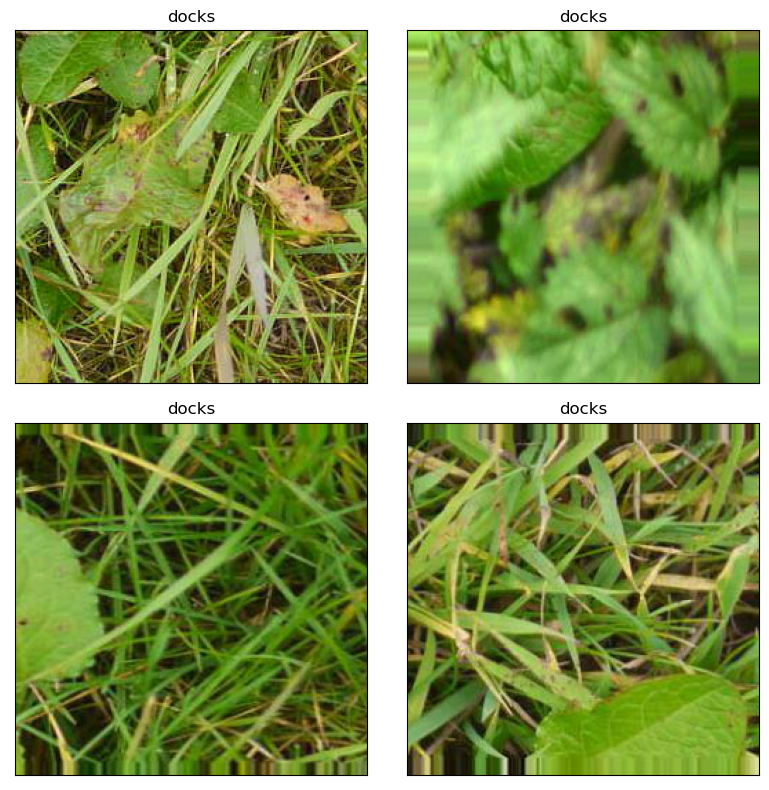

In [31]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
for i, ax in enumerate(axes.flat):
  ax.imshow(imageio.imread(data.Images[i]))
  ax.set_title(data.Labels[i])
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()

In [32]:
train_generator_mobile_net = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split = 0.2
)

test_generator_mobile_net = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [33]:
train_df, test_df = train_test_split(
    data, 
    train_size=0.8, 
    shuffle=True, 
    random_state=42, 
)

train = train_generator_mobile_net.flow_from_dataframe(
    dataframe=train_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training',
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    sheer_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation = train_generator_mobile_net.flow_from_dataframe(
    dataframe=train_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation',
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    sheer_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test = test_generator_mobile_net.flow_from_dataframe(
    dataframe=test_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

Found 4416 validated image filenames belonging to 2 classes.
Found 1104 validated image filenames belonging to 2 classes.
Found 1380 validated image filenames belonging to 2 classes.


In [8]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
def VGG19():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='softmax', name='output'))
    return model

model=VGG19()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [34]:
vgg_ = VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg')
vgg_.trainable = False
x = Dense(256, activation='relu')(vgg_.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(2, activation='softmax')(x)
vgg = Model(inputs=vgg_.inputs, outputs=outputs)

vgg.compile(
    optimizer=Adam(), 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

results = vgg.fit(
    train,
    validation_data = validation,
    batch_size = 32,
    epochs = 8,
    callbacks = [
        EarlyStopping(
            monitor="val_loss",
            patience=4,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(patience=2),
        
    ]
)

Epoch 1/8
138/138 [==============================] - 973s 7s/step - loss: 0.2014 - accuracy: 0.9198 - val_loss: 0.1202 - val_accuracy: 0.9529 - lr: 0.0010
Epoch 2/8
138/138 [==============================] - 998s 7s/step - loss: 0.1215 - accuracy: 0.9506 - val_loss: 0.1105 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/8
138/138 [==============================] - 1017s 7s/step - loss: 0.1026 - accuracy: 0.9599 - val_loss: 0.1222 - val_accuracy: 0.9457 - lr: 0.0010
Epoch 4/8
138/138 [==============================] - 973s 7s/step - loss: 0.0819 - accuracy: 0.9669 - val_loss: 0.1242 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 5/8
138/138 [==============================] - 968s 7s/step - loss: 0.0661 - accuracy: 0.9760 - val_loss: 0.1060 - val_accuracy: 0.9556 - lr: 1.0000e-04
Epoch 6/8
138/138 [==============================] - 997s 7s/step - loss: 0.0624 - accuracy: 0.9792 - val_loss: 0.1034 - val_accuracy: 0.9574 - lr: 1.0000e-04
Epoch 7/8
138/138 [==============================] - 898s 7s/

In [17]:
vgg.save('weedclassification.h5')

In [18]:
model=keras.models.load_model('weedclassification.h5')

In [19]:
predictions = np.argmax(model.predict(test), axis=1)

15/15 [==============================] - 83s 5s/step


In [20]:
labels = dict((v, k) for k, v in train.class_indices.items())
actual = list(test_df.Labels)
predictions = [labels[i] for i in predictions]

In [21]:
cf = confusion_matrix(actual, predictions, normalize = "true")
print(cf)

[[0.69811321 0.30188679]
 [0.00315457 0.99684543]]


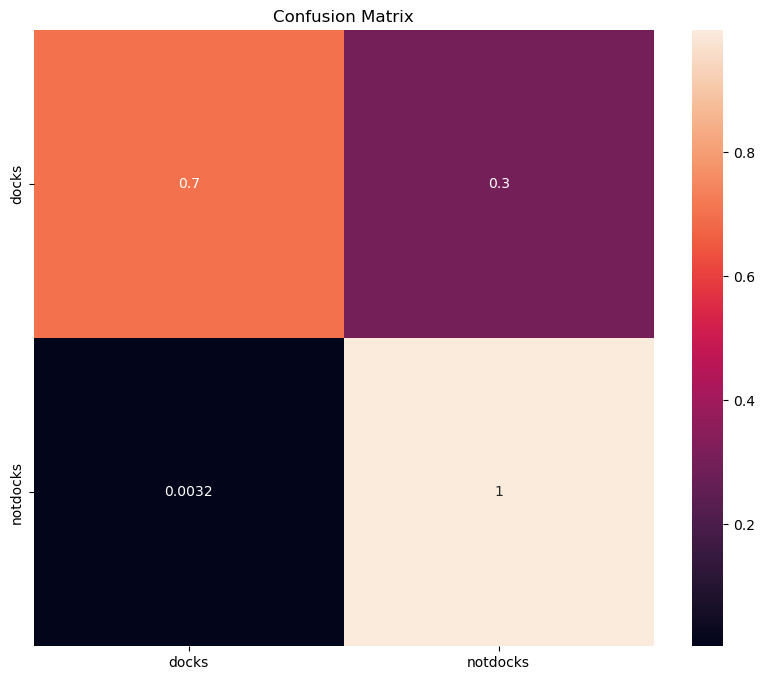

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, xticklabels = sorted(set(actual)), yticklabels = sorted(set(actual)))
plt.title('Confusion Matrix')
plt.show()